In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [36]:
df = pd.read_csv('housing.csv')

In [37]:
df.sample()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5696,-118.26,34.24,35.0,1535.0,283.0,816.0,287.0,6.1873,312100.0,<1H OCEAN


In [38]:
df.shape

(20640, 10)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [40]:
#Since ocean_proximity doesn't contain numerical values
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

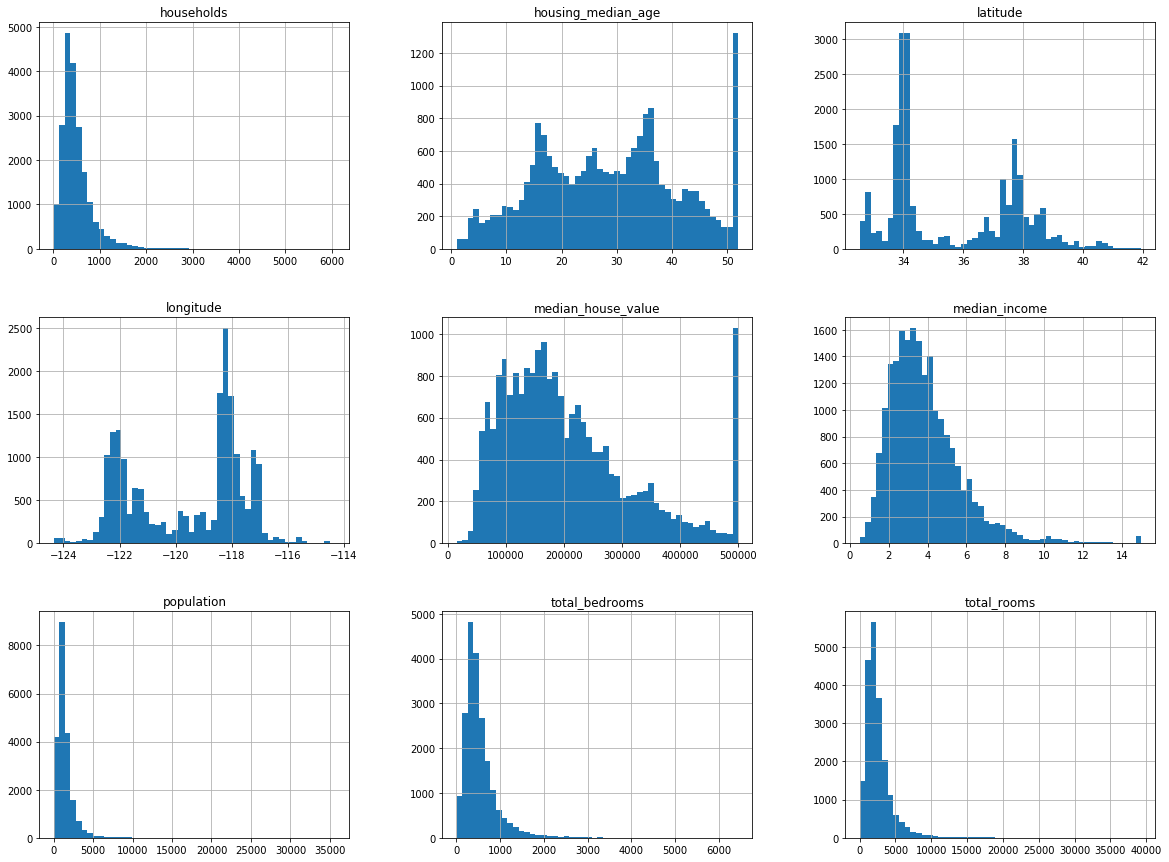

In [41]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [42]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=.2)

In [43]:
test_df.shape

(4128, 10)

In [44]:
#since median_income is an important attribute, categorising it is important. Divide all income values by 1.5,
# round them up. This way we'll have only 5 categories of median_income
df["cat_income"] = np.ceil(df["median_income"]/1.5)

In [45]:
df["cat_income"].value_counts()

3.0     7236
2.0     6581
4.0     3639
5.0     1423
1.0      822
6.0      532
7.0      189
8.0      105
9.0       50
11.0      49
10.0      14
Name: cat_income, dtype: int64

In [46]:
#Since the values below 5 are few, we can merge them with 5.
df["cat_income"].where(df["cat_income"]<5, 5, inplace=True)

In [47]:
df["cat_income"].value_counts()/df.shape[0]

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: cat_income, dtype: float64

In [48]:
from sklearn.model_selection import StratifiedShuffleSplit

In [49]:
split = StratifiedShuffleSplit(n_splits=1, test_size=.2, random_state=42)


In [50]:
for train_index, test_index in split.split(df, df["cat_income"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [51]:
strat_train_set["cat_income"].value_counts()/strat_train_set.shape[0]

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: cat_income, dtype: float64

In [52]:
strat_test_set["cat_income"].value_counts()/strat_test_set.shape[0]

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: cat_income, dtype: float64

In [53]:
strat_train_set.drop(["cat_income"], axis=1, inplace=True)

In [54]:
strat_test_set.drop(["cat_income"], axis=1, inplace=True)

In [55]:
#exploring the data a bit more
copy = strat_train_set.copy()

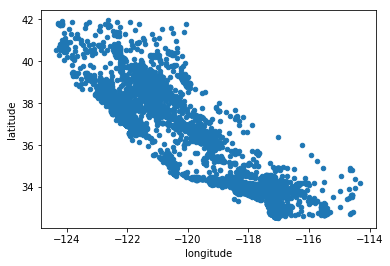

In [56]:
copy.plot(kind="scatter", x="longitude", y="latitude")
plt.show()

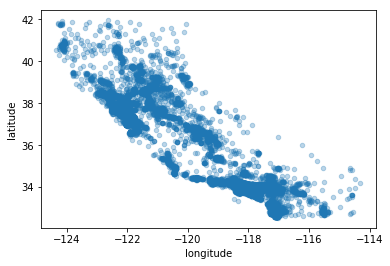

In [61]:
#to get the density of the points too
copy.plot(kind="scatter", x="longitude", y="latitude", alpha=0.3)
plt.show()

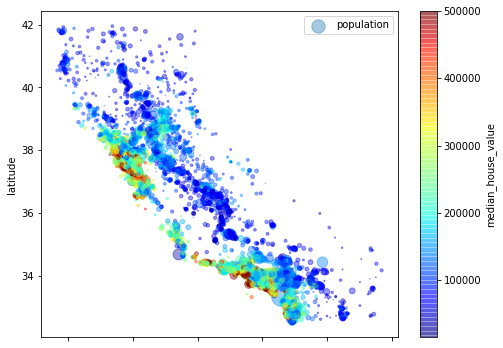

In [65]:
copy.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=copy["population"]/100, label="population",
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, figsize=(8,6)
)
plt.legend()

In [66]:
corr_matrix = copy.corr()

In [68]:
corr_matrix["median_house_value"]

longitude            -0.047432
latitude             -0.142724
housing_median_age    0.114110
total_rooms           0.135097
total_bedrooms        0.047689
population           -0.026920
households            0.064506
median_income         0.687160
median_house_value    1.000000
Name: median_house_value, dtype: float64

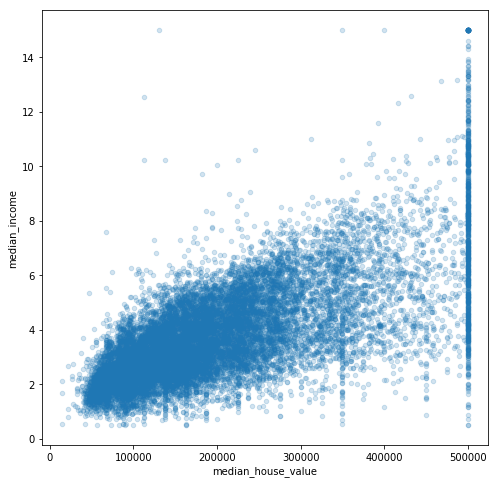

In [73]:
copy.plot(kind="scatter", x="median_house_value", y="median_income", figsize=(8,8), alpha=.2)

In [74]:
copy["rooms_per_household"] = copy["total_rooms"]/copy["households"]
copy["bedrooms_per_room"] = copy["total_bedrooms"]/copy["total_rooms"]
copy["population_per_household"]=copy["population"]/copy["households"]

In [77]:
corr_matrix = copy.corr()
corr_matrix["median_income"].sort_values()

bedrooms_per_room          -0.624674
housing_median_age         -0.111360
latitude                   -0.075205
longitude                  -0.019583
total_bedrooms             -0.009740
population                  0.002380
households                  0.010781
population_per_household    0.021822
total_rooms                 0.200087
rooms_per_household         0.311563
median_house_value          0.687160
median_income               1.000000
Name: median_income, dtype: float64

In [81]:
X = strat_train_set.drop("median_income", axis=1)
y = strat_train_set["median_income"].copy()

In [83]:
y.shape

(16512,)

In [87]:
#Handling missing values
bedroom_med = X["total_bedrooms"].median()
X["total_bedrooms"].fillna(bedroom_med)

17606     351.0
18632     108.0
14650     471.0
3230      371.0
3555     1525.0
19480     588.0
8879      317.0
13685     293.0
4937      465.0
4861      229.0
16365     951.0
19684     559.0
19234     501.0
13956     582.0
2390      495.0
11176     649.0
15614     545.0
2953      251.0
13209     409.0
6569      261.0
5825      913.0
18086     538.0
16718     945.0
13600     278.0
13989     444.0
15168     190.0
6747      563.0
7398      366.0
5562      133.0
16121     416.0
          ...  
12380     767.0
5618       24.0
10060     539.0
18067     438.0
4471      797.0
19786     300.0
9969      393.0
14621    1051.0
579       302.0
11682    1615.0
245       460.0
12130     537.0
16441     544.0
11016     428.0
19934     422.0
1364       34.0
1236      829.0
5364      272.0
11703     300.0
10356     449.0
15270     515.0
3754      373.0
12166     756.0
6003      932.0
7364      212.0
6563      236.0
12053     294.0
13908     872.0
11159     380.0
15775     682.0
Name: total_bedrooms, Le

In [88]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
ocean_prx = strat_train_set["ocean_proximity"]
ocean_encoded = encoder.fit_transform(ocean_prx)

In [89]:
ocean_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [90]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [91]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
hot_ocean_encoded = encoder.fit_transform(ocean_encoded.reshape(-1,1))

In [92]:
hot_ocean_encoded

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [93]:
hot_ocean_encoded.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

Both Label Encoding and OneHot Encoding can be done by the LabelBinarizer class

In [96]:
X.sample()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_house_value,ocean_proximity
49,-122.27,37.82,40.0,946.0,375.0,700.0,352.0,112500.0,NEAR BAY
